In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
import numpy as np

from astropy.cosmology import FlatLambdaCDM
from astropy.visualization import make_lupton_rgb

import lenstronomy.Util.util as util
from lenstronomy.SimulationAPI.sim_api import SimAPI

In [2]:
# Properties of the DES camera & bands
DES_camera = {'read_noise': 7.,  # std of noise generated by read-out (in units of electrons)
               'pixel_scale': 0.2637,  # scale (in arcseconds) of pixels
               'ccd_gain': 4.  # electrons/ADU (analog-to-digital unit). A gain of 8 means that the camera digitizes the CCD signal so that each ADU corresponds to 8 photoelectrons.
              }

DES_g_band_obs = {'exposure_time': 90.,  # exposure time per image (in seconds)
                   'sky_brightness': 36.01,  # sky brightness (in magnitude per square arcseconds)
                   'magnitude_zero_point': 30,  # magnitude in which 1 count per second per arcsecond square is registered (in ADU's)
                   'num_exposures': 7,  # number of exposures that are combined
                   'seeing': 1.12,  # full width at half maximum of the PSF (if not specific psf_model is specified)
                   'psf_type': 'GAUSSIAN',  # string, type of PSF ('GAUSSIAN' and 'PIXEL' supported)
                   'kernel_point_source': None  # 2d numpy array, model of PSF centered with odd number of pixels per axis (optional when psf_type='PIXEL' is chosen)
                  }

kwargs_g_band = util.merge_dicts(DES_camera, DES_g_band_obs)

# numpix = size in arcseconds/ pixel scale (0.2637)
numpix = 60
kwargs_numerics = {'point_source_supersampling_factor': 1}
# Cosmology parameters
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.)

In [3]:
def simulation(redshifts, sigma , centers, lens_ellip, n, i):
    
    kwargs_model_physical = {'lens_model_list': ['SIE'],  # list of lens models to be used
                          'lens_redshift_list': [redshifts['lens']],  # list of redshift of the deflections
                          'lens_light_model_list': ['SERSIC_ELLIPSE'],  # list of unlensed light models to be used
                          'source_light_model_list': ['SERSIC_ELLIPSE'],  # list of extended source models to be used
                          # list of redshfits of the sources in same order as source_light_model_list
                          'source_redshift_list': [redshifts['source1']],
                          'cosmo': cosmo,  # astropy.cosmology instance
                          'z_source': z_source1} # redshift of the default source (if not further specified by 'source_redshift_list') 
                           #and also serves as the redshift of lensed point sources}

    sim_g = SimAPI(numpix=numpix, kwargs_single_band=kwargs_g_band, kwargs_model=kwargs_model_physical)
    imSim_g = sim_g.image_model_class(kwargs_numerics)

    kwargs_mass = [{'sigma_v': sigma, 'center_x': centers['lens'][0], 'center_y': centers['lens'][1], 'e1': lens_ellip[0], 'e2': lens_ellip[1]}]
    kwargs_lens = sim_g.physical2lensing_conversion(kwargs_mass=kwargs_mass)

    #sources light:
    kwargs_source_mag_g_1 = [{'magnitude': 25, 'R_sersic': 0.2, 'n_sersic': 1.5, 'e1': 0., 'e2': 0., 
                              'center_x': centers['source1'][0], 'center_y': centers['source1'][1]}]
    kwargs_lens_light_mag_g = [{'magnitude': 20, 'R_sersic': 0.2, 'n_sersic': 2, 'e1': 0., 'e2': 0., 
                                'center_x': centers['lens'][0], 'center_y': centers['lens'][1]}]
    
    kwargs_lens_light_g, kwargs_source_g , point = sim_g.magnitude2amplitude(kwargs_lens_light_mag=kwargs_lens_light_mag_g, kwargs_source_mag=kwargs_source_mag_g_1, kwargs_ps_mag=None)
    
    image_g = imSim_g.image(kwargs_lens, kwargs_source_g, kwargs_lens_light_g)
    image_g += sim_g.noise_for_model(model=image_g)
    
    plt.figure()
    plt.matshow(np.log10(image_g))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.savefig('Image' + str(n) + str(i) + '.png')
    plt.show(block=True)

In [4]:
z_lens, z_source1 = .2, .7
redshifts = {'lens': z_lens, 'source1': z_source1}
dispersion = 600
lens_ellip = [0,0]
center_lens, center_source1 = [7,0], [0,0]
centers = {'lens': center_lens, 'source1': center_source1}

#simulation(redshifts, dispersion, centers, lens_ellip, 1)

/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10


<Figure size 432x288 with 0 Axes>

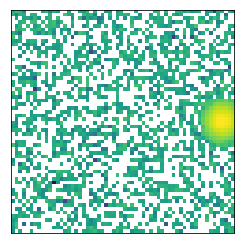

<Figure size 432x288 with 0 Axes>

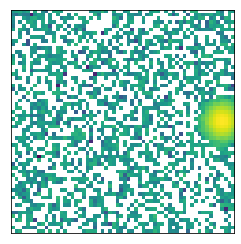

<Figure size 432x288 with 0 Axes>

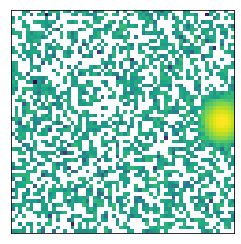

<Figure size 432x288 with 0 Axes>

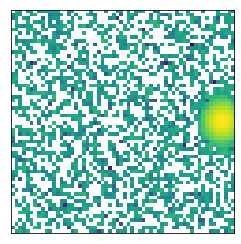

<Figure size 432x288 with 0 Axes>

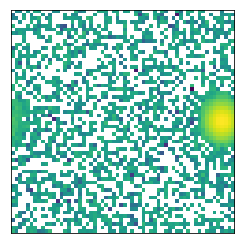

<Figure size 432x288 with 0 Axes>

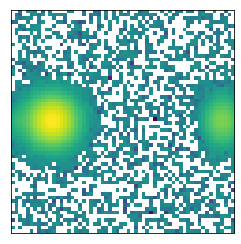

<Figure size 432x288 with 0 Axes>

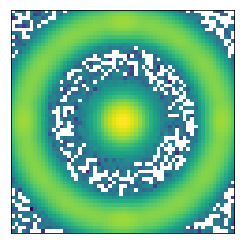

<Figure size 432x288 with 0 Axes>

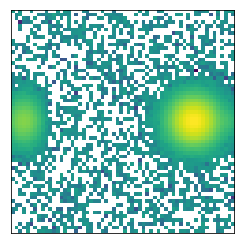

<Figure size 432x288 with 0 Axes>

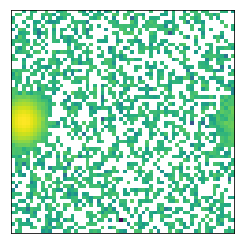

<Figure size 432x288 with 0 Axes>

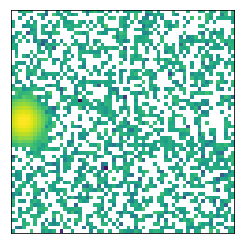

<Figure size 432x288 with 0 Axes>

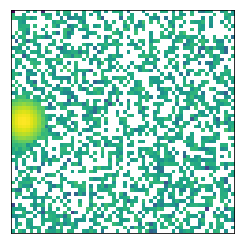

<Figure size 432x288 with 0 Axes>

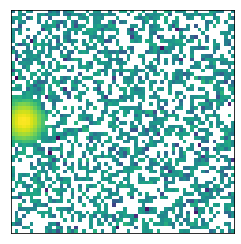

<Figure size 432x288 with 0 Axes>

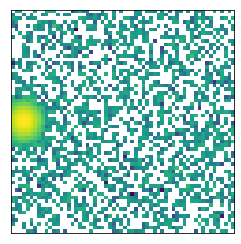

<Figure size 432x288 with 0 Axes>

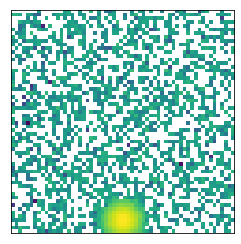

<Figure size 432x288 with 0 Axes>

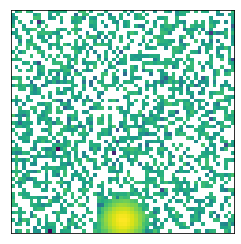

<Figure size 432x288 with 0 Axes>

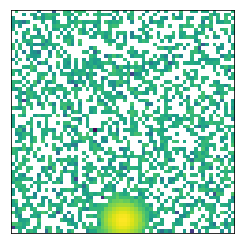

<Figure size 432x288 with 0 Axes>

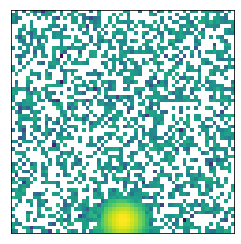

<Figure size 432x288 with 0 Axes>

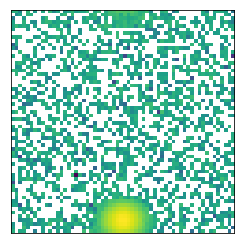

<Figure size 432x288 with 0 Axes>

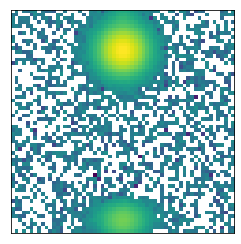

<Figure size 432x288 with 0 Axes>

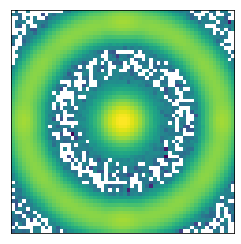

<Figure size 432x288 with 0 Axes>

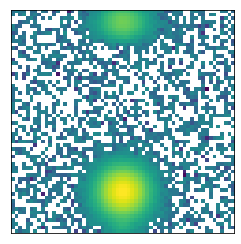

<Figure size 432x288 with 0 Axes>

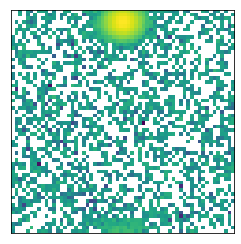

<Figure size 432x288 with 0 Axes>

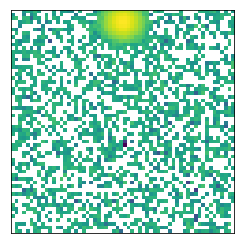

<Figure size 432x288 with 0 Axes>

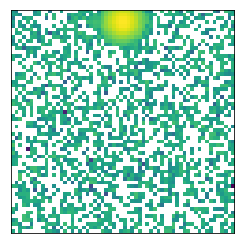

<Figure size 432x288 with 0 Axes>

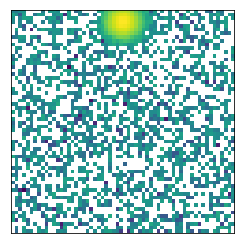

<Figure size 432x288 with 0 Axes>

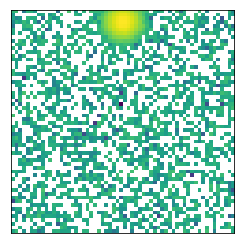

<Figure size 432x288 with 0 Axes>

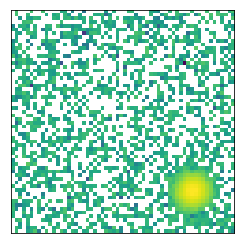

<Figure size 432x288 with 0 Axes>

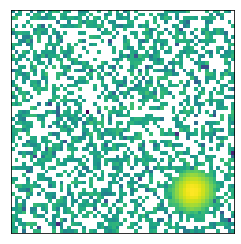

<Figure size 432x288 with 0 Axes>

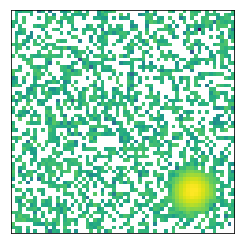

<Figure size 432x288 with 0 Axes>

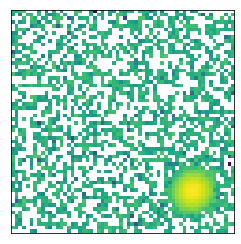

<Figure size 432x288 with 0 Axes>

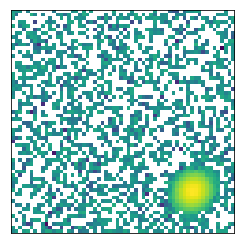

<Figure size 432x288 with 0 Axes>

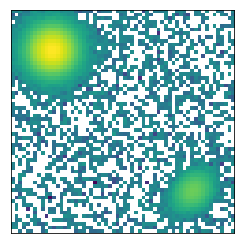

<Figure size 432x288 with 0 Axes>

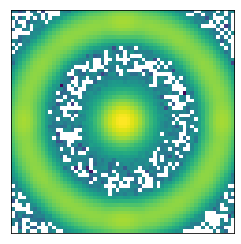

<Figure size 432x288 with 0 Axes>

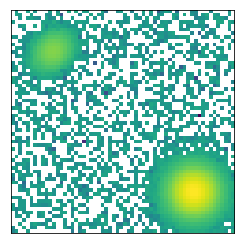

<Figure size 432x288 with 0 Axes>

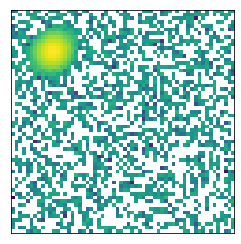

<Figure size 432x288 with 0 Axes>

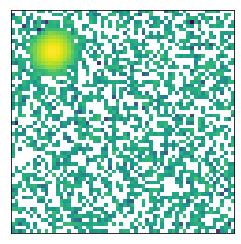

<Figure size 432x288 with 0 Axes>

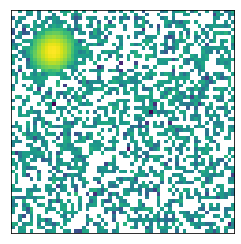

<Figure size 432x288 with 0 Axes>

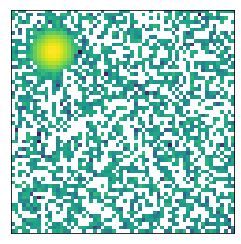

<Figure size 432x288 with 0 Axes>

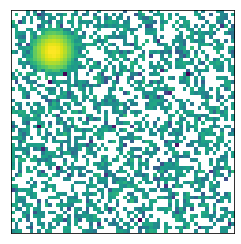

In [5]:
center_source1 = [0, 0]
centers_lens_1, centers_lens_2, centers_lens_3 = [], [], []
x = -30
for i in range(13):
    centers_lens_1.append([x, 0]) #[-30, 0] -> [0, 30]
    centers_lens_2.append([0, x]) #[0, -30] -> [0, 30]
    centers_lens_3.append([x, x])
    x = x + 5  
    
for i in range(len(centers_lens_1)):
    center_lens = centers_lens_1[i]
    centers = {'lens': center_lens, 'source1': center_source1}
    simulation(redshifts, dispersion, centers, lens_ellip, 1, i+100)
    
for i in range(len(centers_lens_2)):
    center_lens = centers_lens_2[i]
    centers = {'lens': center_lens, 'source1': center_source1}
    simulation(redshifts, dispersion, centers, lens_ellip, 2, i+100)
    
for i in range(len(centers_lens_3)):
    center_lens = centers_lens_3[i]
    centers = {'lens': center_lens, 'source1': center_source1}
    simulation(redshifts, dispersion, centers, lens_ellip, 3, i+100)

In [6]:
! convert -delay 50 -loop 0 'Image1'* Gif1_sourcefixed.gif
! convert -delay 50 -loop 0 'Image2'* Gif2_sourcefixed.gif
! convert -delay 50 -loop 0 'Image3'* Gif3_sourcefixed.gif
! rm *.png

{'lens': [0, 0], 'source1': [-6, 0]}


/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10


<Figure size 432x288 with 0 Axes>

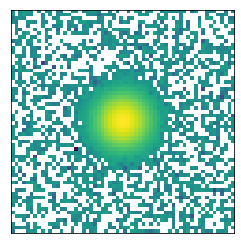

{'lens': [0, 0], 'source1': [-5.5, 0]}


<Figure size 432x288 with 0 Axes>

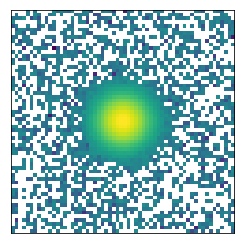

{'lens': [0, 0], 'source1': [-5.0, 0]}


<Figure size 432x288 with 0 Axes>

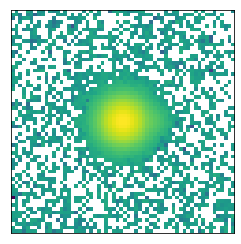

{'lens': [0, 0], 'source1': [-4.5, 0]}


<Figure size 432x288 with 0 Axes>

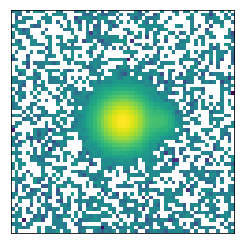

{'lens': [0, 0], 'source1': [-4.0, 0]}


<Figure size 432x288 with 0 Axes>

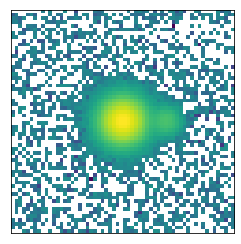

{'lens': [0, 0], 'source1': [-3.5, 0]}


<Figure size 432x288 with 0 Axes>

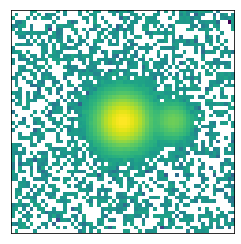

{'lens': [0, 0], 'source1': [-3.0, 0]}


<Figure size 432x288 with 0 Axes>

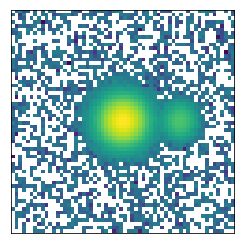

{'lens': [0, 0], 'source1': [-2.5, 0]}


<Figure size 432x288 with 0 Axes>

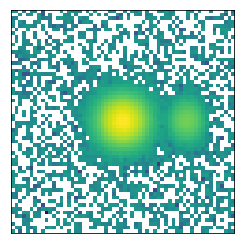

{'lens': [0, 0], 'source1': [-2.0, 0]}


<Figure size 432x288 with 0 Axes>

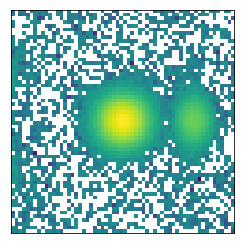

{'lens': [0, 0], 'source1': [-1.5, 0]}


<Figure size 432x288 with 0 Axes>

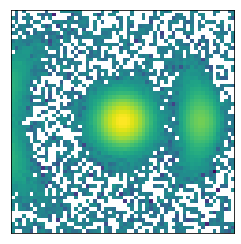

{'lens': [0, 0], 'source1': [-1.0, 0]}


<Figure size 432x288 with 0 Axes>

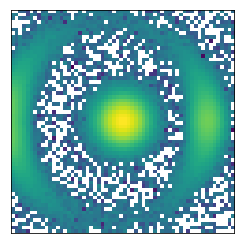

{'lens': [0, 0], 'source1': [-0.5, 0]}


<Figure size 432x288 with 0 Axes>

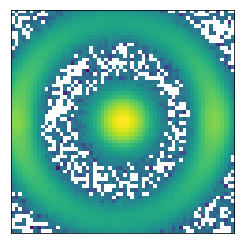

{'lens': [0, 0], 'source1': [0.0, 0]}


<Figure size 432x288 with 0 Axes>

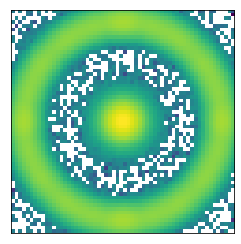

{'lens': [0, 0], 'source1': [0.5, 0]}


<Figure size 432x288 with 0 Axes>

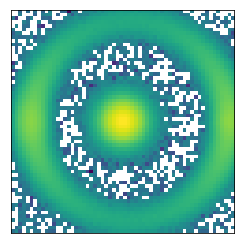

{'lens': [0, 0], 'source1': [1.0, 0]}


<Figure size 432x288 with 0 Axes>

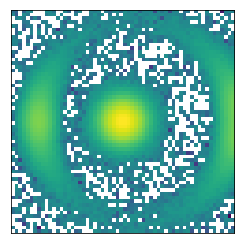

{'lens': [0, 0], 'source1': [1.5, 0]}


<Figure size 432x288 with 0 Axes>

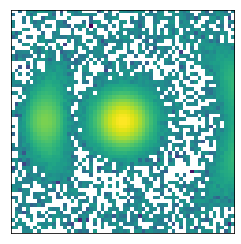

{'lens': [0, 0], 'source1': [2.0, 0]}


<Figure size 432x288 with 0 Axes>

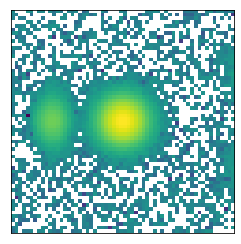

{'lens': [0, 0], 'source1': [2.5, 0]}


<Figure size 432x288 with 0 Axes>

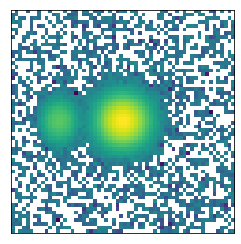

{'lens': [0, 0], 'source1': [3.0, 0]}


<Figure size 432x288 with 0 Axes>

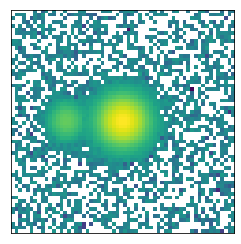

{'lens': [0, 0], 'source1': [3.5, 0]}


<Figure size 432x288 with 0 Axes>

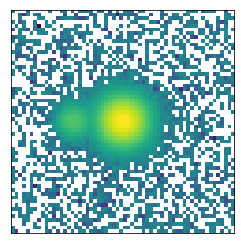

{'lens': [0, 0], 'source1': [4.0, 0]}


<Figure size 432x288 with 0 Axes>

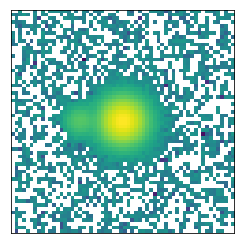

{'lens': [0, 0], 'source1': [4.5, 0]}


<Figure size 432x288 with 0 Axes>

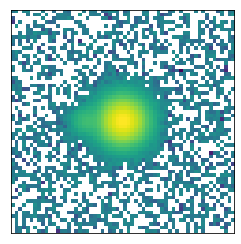

{'lens': [0, 0], 'source1': [5.0, 0]}


<Figure size 432x288 with 0 Axes>

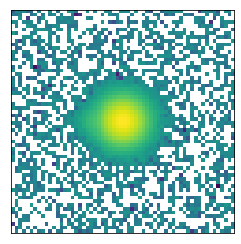

{'lens': [0, 0], 'source1': [5.5, 0]}


<Figure size 432x288 with 0 Axes>

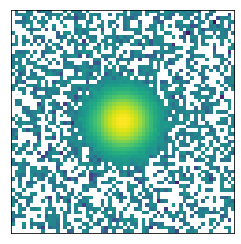

{'lens': [0, 0], 'source1': [0, -6]}


<Figure size 432x288 with 0 Axes>

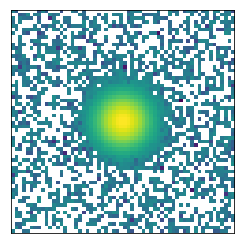

{'lens': [0, 0], 'source1': [0, -5.5]}


<Figure size 432x288 with 0 Axes>

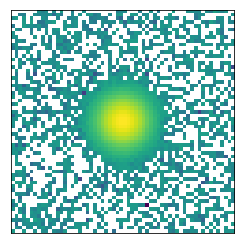

{'lens': [0, 0], 'source1': [0, -5.0]}


<Figure size 432x288 with 0 Axes>

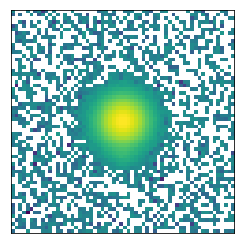

{'lens': [0, 0], 'source1': [0, -4.5]}


<Figure size 432x288 with 0 Axes>

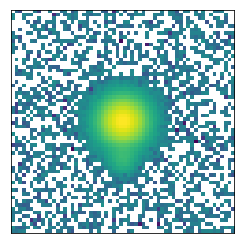

{'lens': [0, 0], 'source1': [0, -4.0]}


<Figure size 432x288 with 0 Axes>

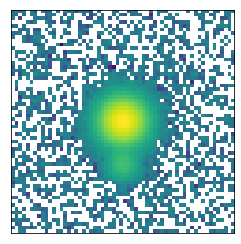

{'lens': [0, 0], 'source1': [0, -3.5]}


<Figure size 432x288 with 0 Axes>

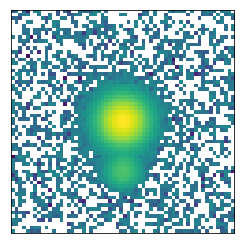

{'lens': [0, 0], 'source1': [0, -3.0]}


<Figure size 432x288 with 0 Axes>

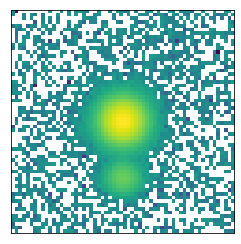

{'lens': [0, 0], 'source1': [0, -2.5]}


<Figure size 432x288 with 0 Axes>

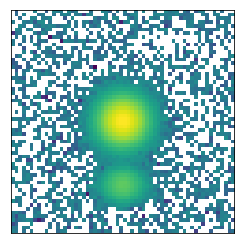

{'lens': [0, 0], 'source1': [0, -2.0]}


<Figure size 432x288 with 0 Axes>

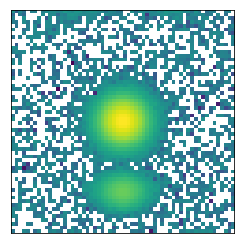

{'lens': [0, 0], 'source1': [0, -1.5]}


<Figure size 432x288 with 0 Axes>

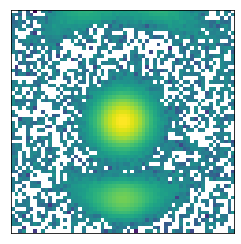

{'lens': [0, 0], 'source1': [0, -1.0]}


<Figure size 432x288 with 0 Axes>

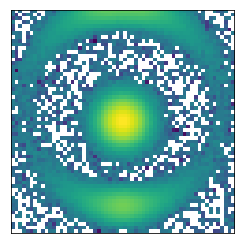

{'lens': [0, 0], 'source1': [0, -0.5]}


<Figure size 432x288 with 0 Axes>

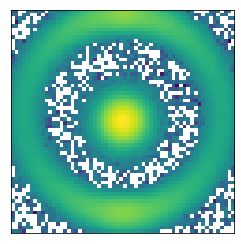

{'lens': [0, 0], 'source1': [0, 0.0]}


<Figure size 432x288 with 0 Axes>

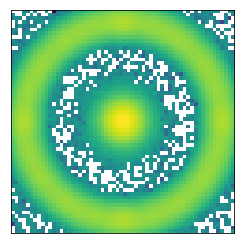

{'lens': [0, 0], 'source1': [0, 0.5]}


<Figure size 432x288 with 0 Axes>

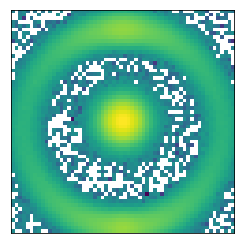

{'lens': [0, 0], 'source1': [0, 1.0]}


<Figure size 432x288 with 0 Axes>

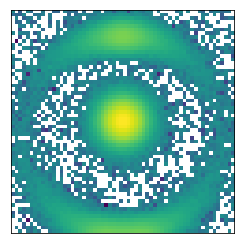

{'lens': [0, 0], 'source1': [0, 1.5]}


<Figure size 432x288 with 0 Axes>

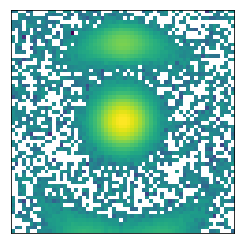

{'lens': [0, 0], 'source1': [0, 2.0]}


<Figure size 432x288 with 0 Axes>

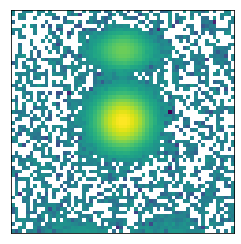

{'lens': [0, 0], 'source1': [0, 2.5]}


<Figure size 432x288 with 0 Axes>

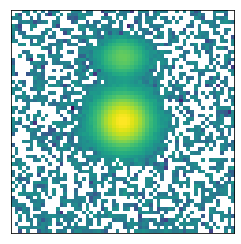

{'lens': [0, 0], 'source1': [0, 3.0]}


<Figure size 432x288 with 0 Axes>

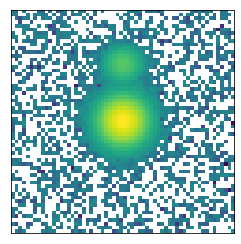

{'lens': [0, 0], 'source1': [0, 3.5]}


<Figure size 432x288 with 0 Axes>

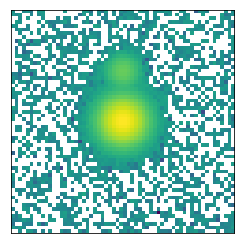

{'lens': [0, 0], 'source1': [0, 4.0]}


<Figure size 432x288 with 0 Axes>

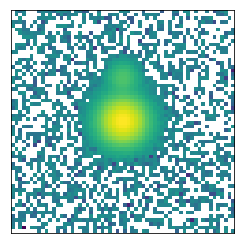

{'lens': [0, 0], 'source1': [0, 4.5]}


<Figure size 432x288 with 0 Axes>

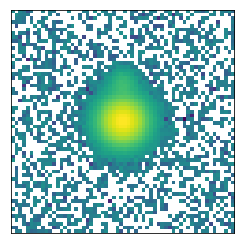

{'lens': [0, 0], 'source1': [0, 5.0]}


<Figure size 432x288 with 0 Axes>

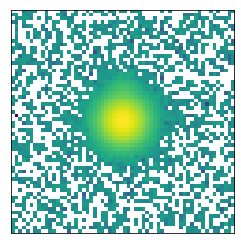

{'lens': [0, 0], 'source1': [0, 5.5]}


<Figure size 432x288 with 0 Axes>

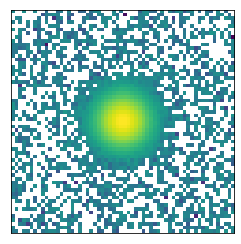

{'lens': [0, 0], 'source1': [-6, -6]}


<Figure size 432x288 with 0 Axes>

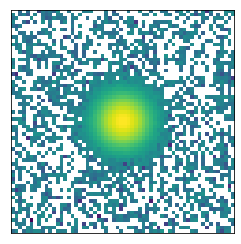

{'lens': [0, 0], 'source1': [-5.5, -5.5]}


<Figure size 432x288 with 0 Axes>

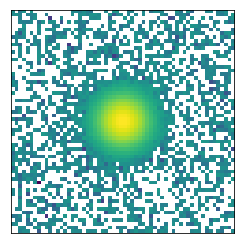

{'lens': [0, 0], 'source1': [-5.0, -5.0]}


<Figure size 432x288 with 0 Axes>

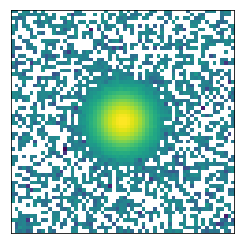

{'lens': [0, 0], 'source1': [-4.5, -4.5]}


<Figure size 432x288 with 0 Axes>

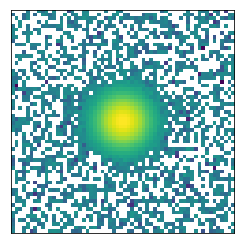

{'lens': [0, 0], 'source1': [-4.0, -4.0]}


<Figure size 432x288 with 0 Axes>

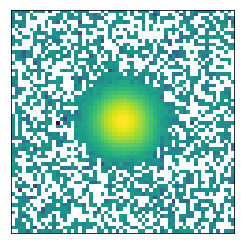

{'lens': [0, 0], 'source1': [-3.5, -3.5]}


<Figure size 432x288 with 0 Axes>

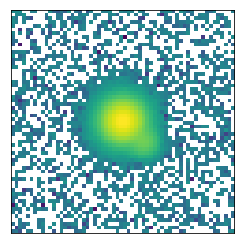

{'lens': [0, 0], 'source1': [-3.0, -3.0]}


<Figure size 432x288 with 0 Axes>

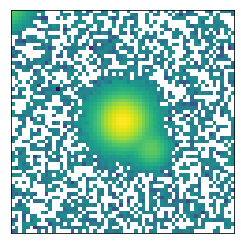

{'lens': [0, 0], 'source1': [-2.5, -2.5]}


<Figure size 432x288 with 0 Axes>

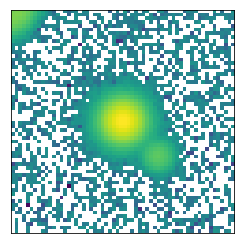

{'lens': [0, 0], 'source1': [-2.0, -2.0]}


<Figure size 432x288 with 0 Axes>

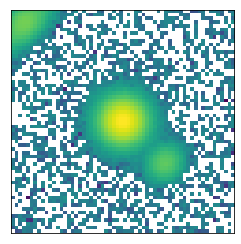

{'lens': [0, 0], 'source1': [-1.5, -1.5]}


<Figure size 432x288 with 0 Axes>

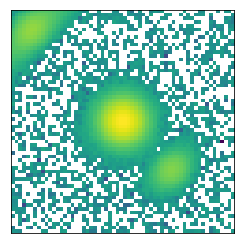

{'lens': [0, 0], 'source1': [-1.0, -1.0]}


<Figure size 432x288 with 0 Axes>

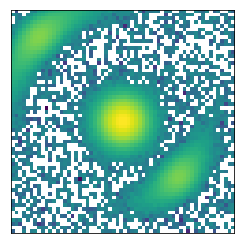

{'lens': [0, 0], 'source1': [-0.5, -0.5]}


<Figure size 432x288 with 0 Axes>

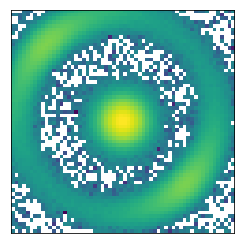

{'lens': [0, 0], 'source1': [0.0, 0.0]}


<Figure size 432x288 with 0 Axes>

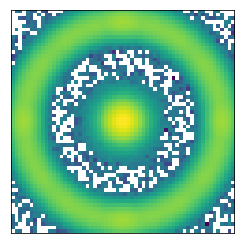

{'lens': [0, 0], 'source1': [0.5, 0.5]}


<Figure size 432x288 with 0 Axes>

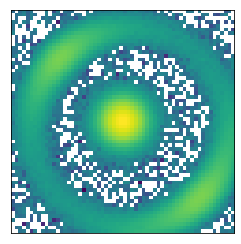

{'lens': [0, 0], 'source1': [1.0, 1.0]}


<Figure size 432x288 with 0 Axes>

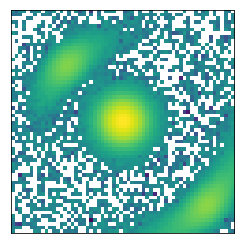

{'lens': [0, 0], 'source1': [1.5, 1.5]}


<Figure size 432x288 with 0 Axes>

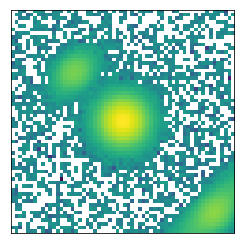

{'lens': [0, 0], 'source1': [2.0, 2.0]}


<Figure size 432x288 with 0 Axes>

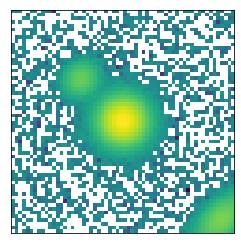

{'lens': [0, 0], 'source1': [2.5, 2.5]}


<Figure size 432x288 with 0 Axes>

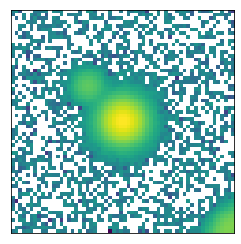

{'lens': [0, 0], 'source1': [3.0, 3.0]}


<Figure size 432x288 with 0 Axes>

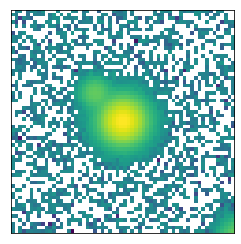

{'lens': [0, 0], 'source1': [3.5, 3.5]}


<Figure size 432x288 with 0 Axes>

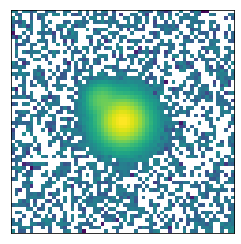

{'lens': [0, 0], 'source1': [4.0, 4.0]}


<Figure size 432x288 with 0 Axes>

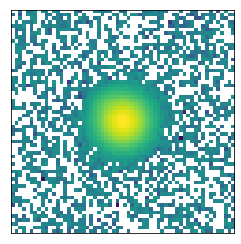

{'lens': [0, 0], 'source1': [4.5, 4.5]}


<Figure size 432x288 with 0 Axes>

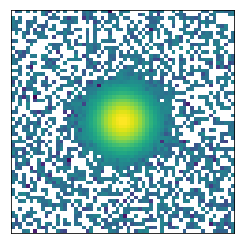

{'lens': [0, 0], 'source1': [5.0, 5.0]}


<Figure size 432x288 with 0 Axes>

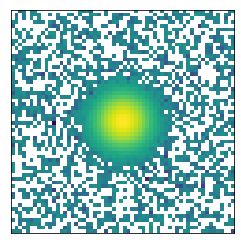

{'lens': [0, 0], 'source1': [5.5, 5.5]}


<Figure size 432x288 with 0 Axes>

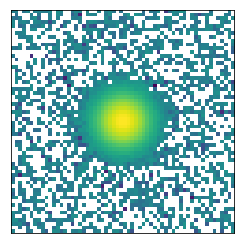

In [7]:
# I should do the contrary now, center of lens fixed and source center vary
center_source1 = [0, 0]
centers_lens_1, centers_lens_2, centers_lens_3 = [], [], []
x = -6
for i in range(24):
    centers_lens_1.append([x, 0]) #[-30, 0] -> [0, 30]
    centers_lens_2.append([0, x]) #[0, -30] -> [0, 30]
    centers_lens_3.append([x, x])
    x = x + 0.5

for i in range(len(centers_lens_1)):
    center_lens = centers_lens_1[i]
    centers = {'lens': center_source1, 'source1': center_lens}
    print(centers)
    simulation(redshifts, dispersion, centers, lens_ellip, 1, i+1000)
    
for i in range(len(centers_lens_2)):
    center_lens = centers_lens_2[i]
    centers = {'lens': center_source1, 'source1': center_lens}
    print(centers)
    simulation(redshifts, dispersion, centers, lens_ellip, 2, i+1000)
    
for i in range(len(centers_lens_3)):
    center_lens = centers_lens_3[i]
    centers = {'lens': center_source1, 'source1': center_lens}
    print(centers)
    simulation(redshifts, dispersion, centers, lens_ellip, 3, i+1000)

In [8]:
! convert -delay 50 -loop 0 'Image1'* Gif1_lensfixed.gif
! convert -delay 50 -loop 0 'Image2'* Gif2_lensfixed.gif
! convert -delay 50 -loop 0 'Image3'* Gif3_lensfixed.gif
! rm *.png

In [9]:
def simulation1(redshifts, sigma , centers, lens_ellip, n, i):
    
    kwargs_model_physical = {'lens_model_list': ['SIE'],  # list of lens models to be used
                          'lens_redshift_list': [redshifts['lens']],  # list of redshift of the deflections
                          'lens_light_model_list': ['SERSIC_ELLIPSE'],  # list of unlensed light models to be used
                          'source_light_model_list': ['SERSIC_ELLIPSE'],  # list of extended source models to be used
                          # list of redshfits of the sources in same order as source_light_model_list
                          'source_redshift_list': [redshifts['source1']],
                          'cosmo': cosmo,  # astropy.cosmology instance
                          'z_source': z_source1} # redshift of the default source (if not further specified by 'source_redshift_list') 
                           #and also serves as the redshift of lensed point sources}

    sim_g = SimAPI(numpix=numpix, kwargs_single_band=kwargs_g_band, kwargs_model=kwargs_model_physical)
    imSim_g = sim_g.image_model_class(kwargs_numerics)

    kwargs_mass = [{'sigma_v': sigma, 'center_x': centers['lens'][0], 'center_y': centers['lens'][1], 'e1': lens_ellip[0], 'e2': lens_ellip[1]}]
    kwargs_lens = sim_g.physical2lensing_conversion(kwargs_mass=kwargs_mass)

    #sources light:
    kwargs_source_mag_g_1 = [{'magnitude': 28, 'R_sersic': 0.3, 'n_sersic': 1.5, 'e1': 0., 'e2': 0., 
                              'center_x': centers['source1'][0], 'center_y': centers['source1'][1]}]
    kwargs_lens_light_mag_g = [{'magnitude': 20, 'R_sersic': 0.4, 'n_sersic': 2, 'e1': 0., 'e2': 0., 'center_x': center_lens[0], 'center_y': center_lens[1]}]
    
    kwargs_lens_light_g, kwargs_source_g , point = sim_g.magnitude2amplitude(kwargs_lens_light_mag=kwargs_lens_light_mag_g, kwargs_source_mag=kwargs_source_mag_g_1, kwargs_ps_mag=None)
    
    image_g = imSim_g.image(kwargs_lens, kwargs_source_g, kwargs_lens_light_g)
    image_g += sim_g.noise_for_model(model=image_g)
    
    plt.figure()
    plt.matshow(np.log10(image_g))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.savefig('Image' + str(n) + str(i) + '.png')
    plt.show(block=True)